### Project Overview:
- You goal if to take a fashion data set of images and create a Convolutional Neural Network that will accurately predict the image(80 -90% of the time)
- Data will be imported from keras data sets

### Porject Approach:
- Import data from Keras
- Reshape images if needed
- One hot incode the labels
- Test this model on random or new data to test its performance
- create a Tensorboard for them model 
- Save the model

## Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Importing Data
- Will import data form Tensorflow and Keras library

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

### Sample Image
- Lets take a look at one of our image
- appears that the first image is a sneaker and also our images are in greyscaled so will be on a color scale of 1

In [8]:
sample_image = x_train[0]

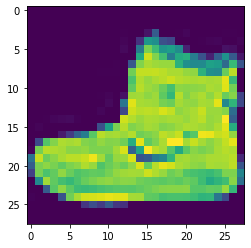

In [9]:
plt.imshow(sample_image)

#### Scaling the images
- Since the mad that an image can go on a color scale is 255 we will use this number to scale the images
- we will see that out images retains their dimension as well as plot/present the same image 

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_train.shape

(60000, 28, 28)

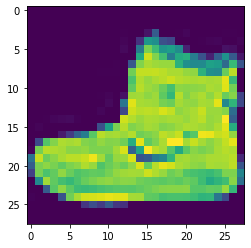

In [15]:
plt.imshow(x_train[0])

### One hot encode - Labels 
- So that our model does not think we are looking for some sort of linear relationshop between our data we wull need to one hot encode the labels

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_test_cat = to_categorical(y_test)

In [18]:
y_train_cat = to_categorical(y_train)

In [19]:
y_test_cat.shape

(10000, 10)

In [20]:
y_train_cat.shape

(60000, 10)

### Reshaping the data
- for our model to recognize the color channel at greystyle we need to add this dimention ot the image array (1)

In [21]:
x_train = x_train.reshape(60000, 28, 28,1)

In [22]:
x_test = x_test.reshape(10000, 28,28,1)

### Creating the model
- We wil use a Sequential Model with:
- Conv2D, MaxPool2D, Flatten, adn Dense layer 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

### Early Stopping
- Will assit in preventing overtraining 
- Stop training when the model is not showing improvments for a certian patience 

In [30]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=8)

### Tensor Board
- Will use to inspect the train phases for the images as well as each layer of the network 

In [31]:
log_dir = "logs/fit"
board = TensorBoard(log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,)

## Model Architecture
- will import model train on AWS EC2 virtual Machine

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model = load_model("fashion_classify.h5")

In [32]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1),
                padding = "valid", input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1),
                padding = "valid", input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1),
                padding = "valid", input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(units = 250, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

### Fitting model
- Fit data to model 
- will run on AWS EC2 instance for time sake
- Save model and import 

In [33]:
model.fit(x_train, y_train_cat, validation_data=(x_test,y_test_cat), epochs=20, callbacks=[stop, board])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 696us/sample - loss: 0.5323 - accuracy: 0.8043 - val_loss: 0.3977 - val_accuracy: 0.8551
Epoch 2/20
60000/60000 [==============================] - 41s 686us/sample - loss: 0.3544 - accuracy: 0.8692 - val_loss: 0.3581 - val_accuracy: 0.8666
Epoch 3/20
60000/60000 [==============================] - 41s 684us/sample - loss: 0.3126 - accuracy: 0.8825 - val_loss: 0.3345 - val_accuracy: 0.8772
Epoch 4/20
60000/60000 [==============================] - 41s 680us/sample - loss: 0.2817 - accuracy: 0.8956 - val_loss: 0.3201 - val_accuracy: 0.8856
Epoch 5/20
60000/60000 [==============================] - 41s 679us/sample - loss: 0.2597 - accuracy: 0.9026 - val_loss: 0.3049 - val_accuracy: 0.8913
Epoch 6/20
60000/60000 [==============================] - 41s 680us/sample - loss: 0.2398 - accuracy: 0.9106 - val_loss: 0.3105 - val_accuracy: 0.8916
Epoch 7/20
60000/60000 [====================

In [35]:
##metrics = pd.DataFrame(model.history.history)

In [46]:
##metrics.to_csv("model_history.csv")

In [47]:
#model.save("fashion_classify.h5")

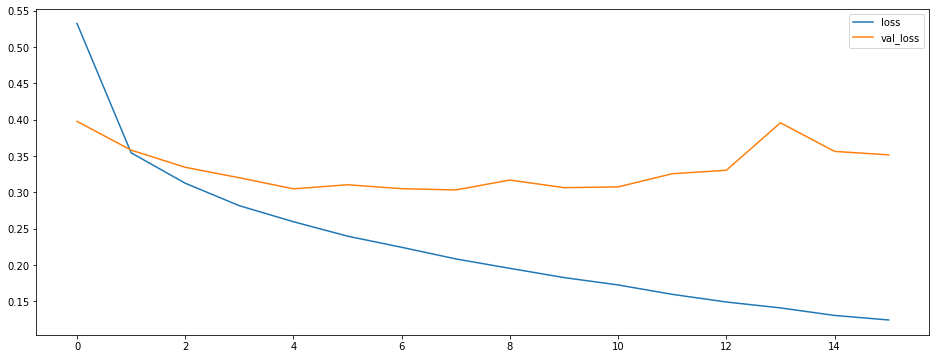

In [37]:
metrics[["loss", "val_loss"]].plot(figsize = (16,6))

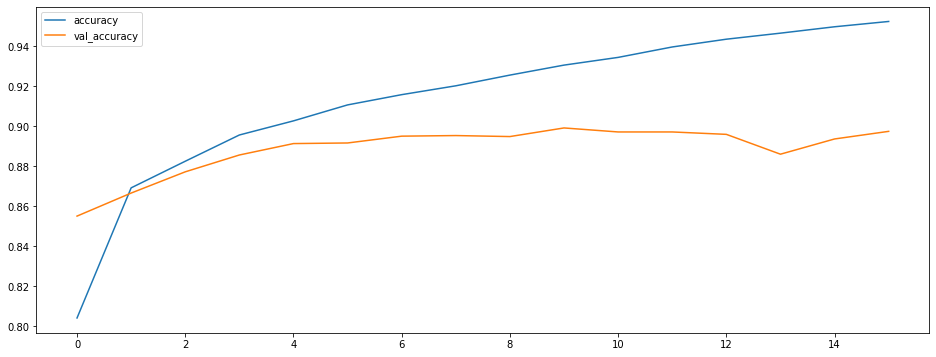

In [38]:
metrics[["accuracy", "val_accuracy"]].plot(figsize = (16,6))

### Predictions 
- Lets see how well or model predict

In [39]:
predictions = model.predict_classes(x_test)

### Metrics for predictions

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.84      0.84      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.84      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.67      0.76      0.71      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [42]:
print(confusion_matrix(y_test,predictions))

[[802   0  23  17   4   1 148   0   5   0]
 [  2 978   0  11   3   0   4   0   2   0]
 [  7   0 838  11  60   0  84   0   0   0]
 [  8   2  20 905  31   1  33   0   0   0]
 [  1   1  42  21 840   0  95   0   0   0]
 [  0   0   0   0   0 965   0  25   2   8]
 [ 78   1  58  27  72   0 757   0   7   0]
 [  0   0   0   0   0   7   0 971   0  22]
 [  5   0   7   5   5   3  11   3 961   0]
 [  0   0   0   0   0   6   0  37   0 957]]


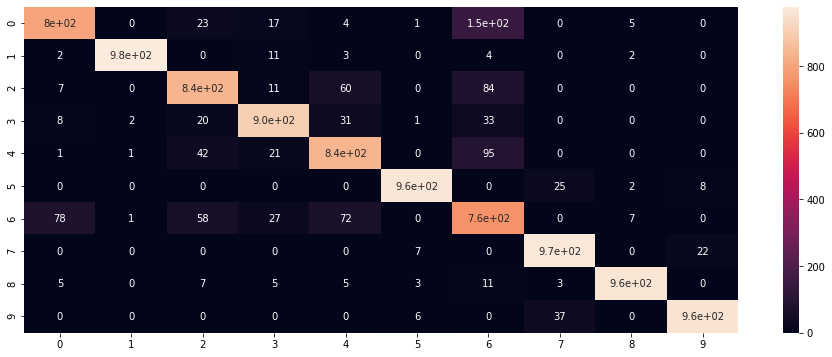

In [44]:
plt.figure(figsize=(16,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

### Model accurately explains about  82% of the difference in images 

In [45]:
print(explained_variance_score(y_test,predictions))

0.8226119866666667
